# PROBLEM STATEMENT

- To develop a regression model to predict the probability of being accepted for Graduate school.


- The dataset contains the following attributes: 
    - GRE Scores (out of 340) 
    - TOEFL Scores (out of 120) 
    - University Rating (out of 5) 
    - Statement of Purpose and Letter of Recommendation Strength (out of 5) 
    - Undergraduate GPA (out of 10) 
    - Research Experience (either 0 or 1) 
    - Chance of Admit (ranging from 0 to 1)

# 1. IMPORT LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. IMPORT DATASET

In [3]:
# Load data

admission_df = pd.read_csv('Admission.csv')
admission_df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [4]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Admission Chance     400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
admission_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
admission_df['Serial No.'].nunique()

400

In [7]:
# drop "Serial No." column as it is unique
admission_df = admission_df.drop(['Serial No.'], axis=1)

In [9]:
# Check for any duplicates
admission_df.duplicated().sum()

0

# 3. VISUALIZE DATASET

## 3.1 Pairplot

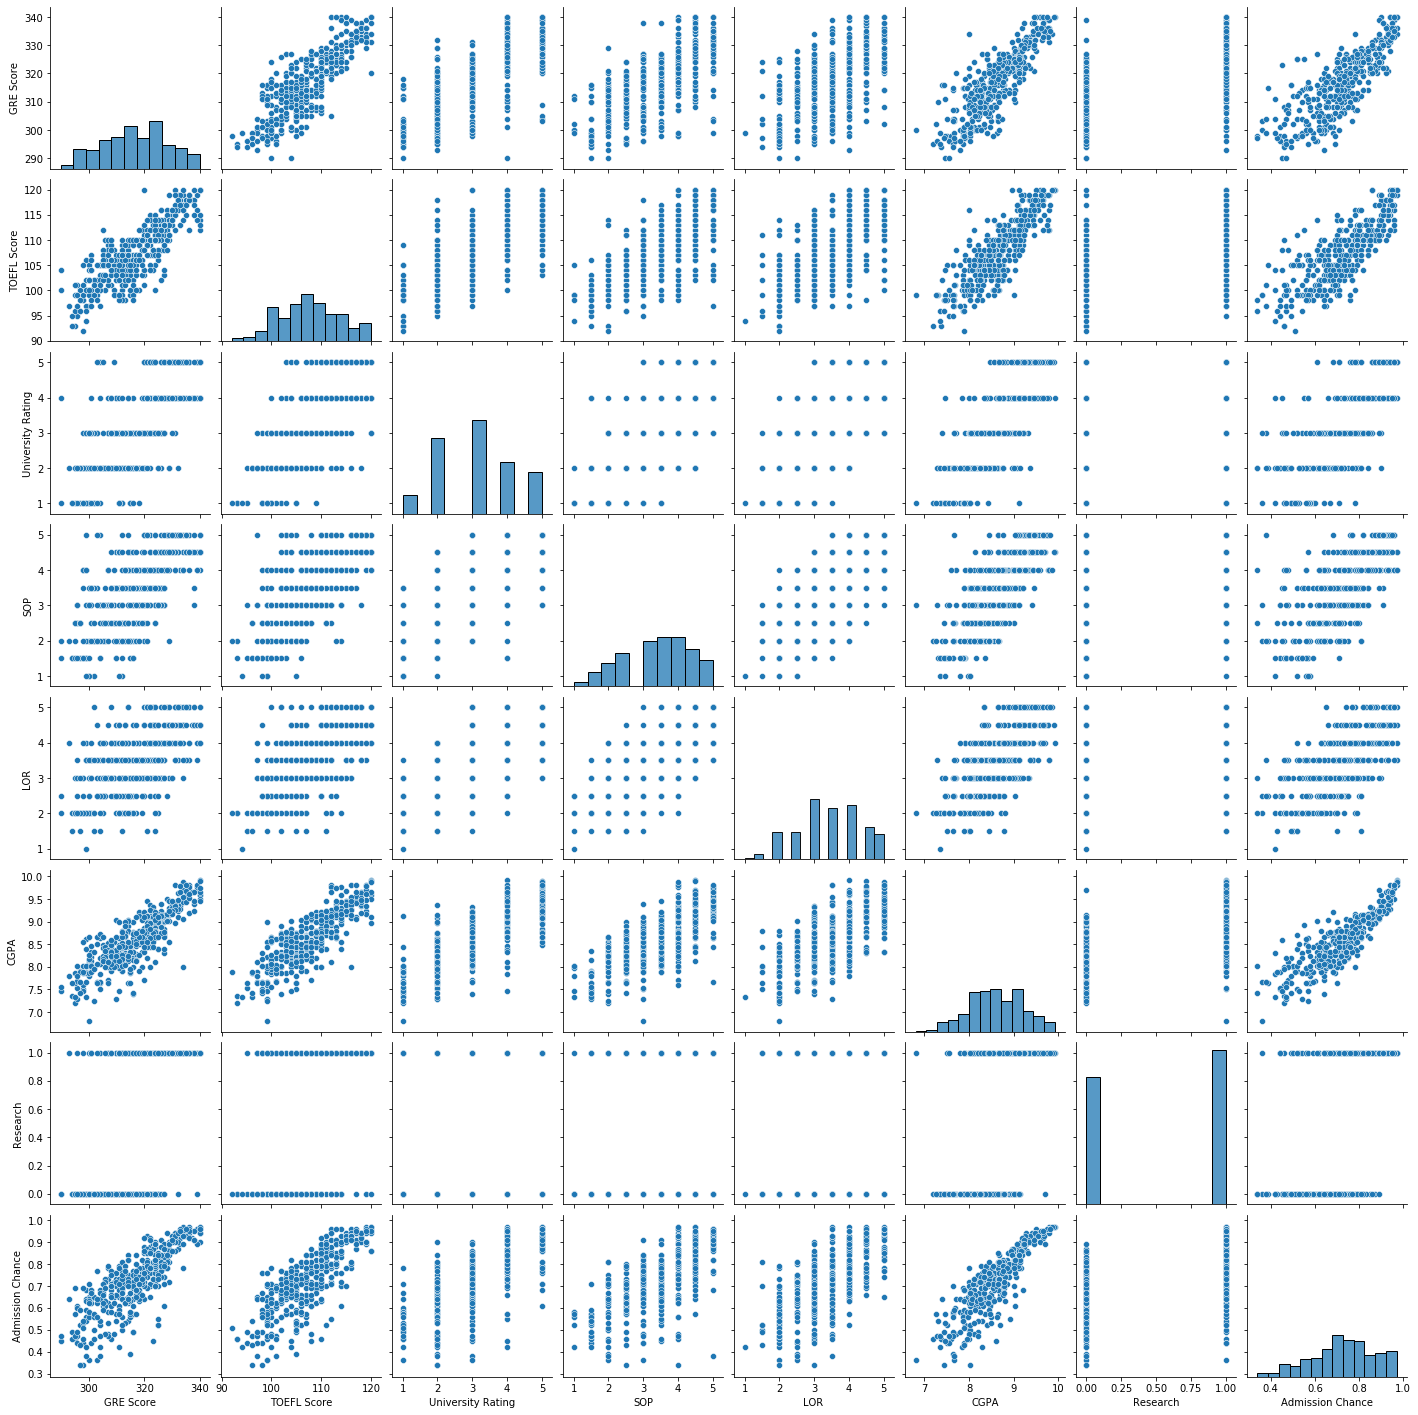

In [10]:
sns.pairplot(admission_df)

## 3.2 Correlation map

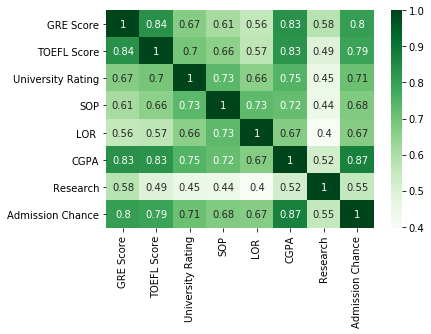

In [11]:
corr_df = admission_df.corr()
sns.heatmap(corr_df, cmap='Greens', annot=True)

## 3.3 Boxplot

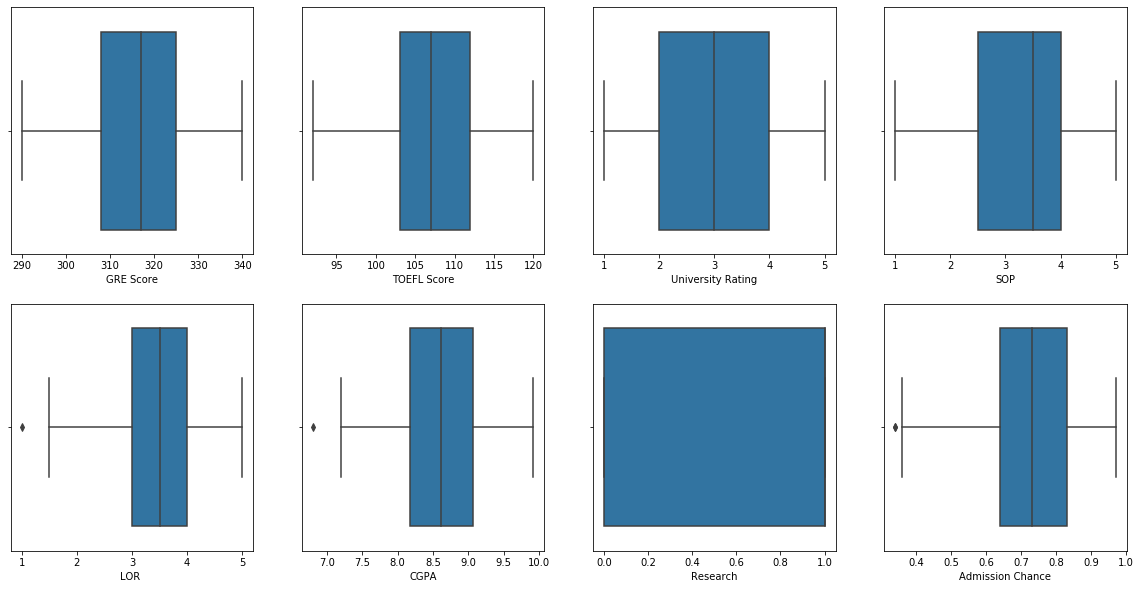

In [15]:
i = 1
fig, ax = plt.subplots(2, 4, figsize = (20, 10))

for column_header in admission_df.columns:
    plt.subplot(2,4,i)
    sns.boxplot(x=admission_df[column_header])
    i = i + 1


# 4. CREATE TRAINING AND TESTING DATASET

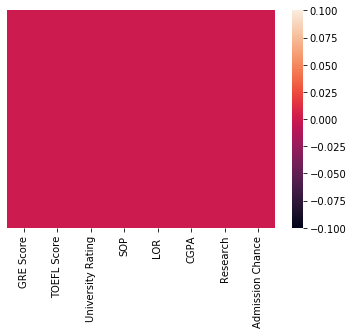

In [18]:
# Check for null values before creating training and testing dataset
sns.heatmap(admission_df.isnull(), yticklabels=False)

## 4.1 Create independent and dependent variables

In [19]:
X = admission_df.drop(['Admission Chance'], axis=1)
y = admission_df['Admission Chance']

In [20]:
print(X.shape)
print(y.shape)

(400, 7)
(400,)


## 4.2 Split the data

In [21]:
# Splitting data in 80:20 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [22]:
print('X_train: ', X_train.shape, ' X_test', X_test.shape)
print('y_train: ', y_train.shape, ' y_test', y_test.shape)

X_train:  (320, 7)  X_test (80, 7)
y_train:  (320,)  y_test (80,)


# 5. TRAINING THE MODEL

In [25]:
from sklearn.model_selection import cross_val_score

## 5.1 Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression

regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression()

In [61]:
print('Linear Model Coeff (m)', regressor1.coef_)
print('Linear Model Coeff (b)', regressor1.intercept_)

Linear Model Coeff (m) [ 0.00186251  0.00272369  0.00737745 -0.00029274  0.01577024  0.11466916
  0.02222705]
Linear Model Coeff (b) -1.2302337510969892


In [62]:
# Test model on training dataset using cross validation
scores = cross_val_score(regressor1, X_train, y_train, cv=5)
print(scores, ' Mean: ', scores.mean())

[0.77638793 0.72893211 0.76480008 0.7595322  0.87366886]  Mean:  0.7806642370301872


## 5.2 Lasso Regression

In [63]:
from sklearn.linear_model import Lasso

regressor2 = Lasso(alpha=0.0009)
regressor2.fit(X_train, y_train)

Lasso(alpha=0.0009)

In [64]:
print('Lasso Linear Model Coeff (m)', regressor2.coef_)
print('Lasso Linear Model Coeff (b)', regressor2.intercept_)

Lasso Linear Model Coeff (m) [0.00225085 0.00306652 0.00756714 0.         0.01597208 0.10446633
 0.01681477]
Lasso Linear Model Coeff (b) -1.3018481210253743


In [65]:
# Test model on training dataset using cross validation
scores = cross_val_score(regressor2, X_train, y_train, cv=5)
print(scores, ' Mean: ', scores.mean())

[0.773164   0.72733662 0.77131533 0.75987845 0.87448743]  Mean:  0.7812363635371435


# 6. EVALUATING THE MODEL 

In [68]:
def plot_prediction_vs_actual(actual, prediction):
    plt.figure(figsize=(10,10))
    sns.scatterplot(x=actual, y=prediction)
    plt.xlabel('Actual')
    plt.ylabel('Prediction')
    plt.show()

## 6.1 # Prediction on Test data using regressor1 (Linear Regression)

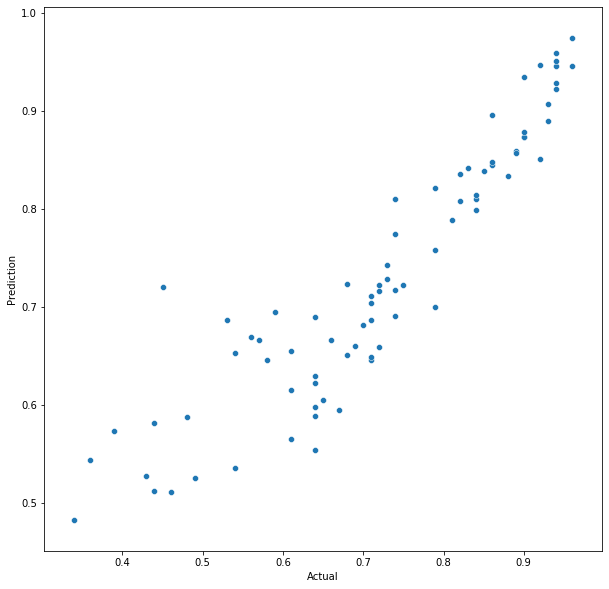

In [69]:
y_predict1 = regressor1.predict(X_test)
plot_prediction_vs_actual(y_test, y_predict1)

## 6.2 Prediction on Test data using regressor2 (Lasso Linear Regression)

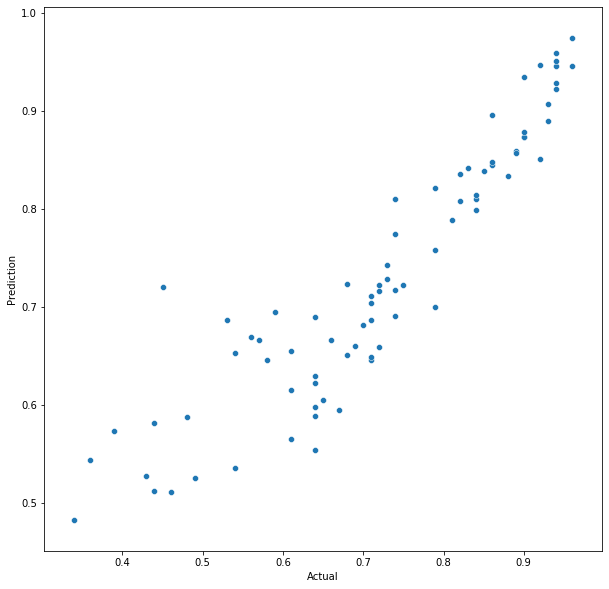

In [70]:
y_predict2 = regressor1.predict(X_test)
plot_prediction_vs_actual(y_test, y_predict2)

## 6.3 Evaluate on key metrics

In [72]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [75]:
k = X_test.shape[1]
n = len(X_test)
print('Evaluation metrics of Linear Regressor and Lasso Regressor respectively are:\n')
for predictions in [y_predict1, y_predict2]:
    MSE = mean_squared_error(y_test, predictions)
    RMSE = sqrt(MSE)
    MAE = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
    MAPE = np.mean(np.abs((y_test-predictions)/y_test))*100
    
    print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMean Absolute Percentage Error =', MAPE, '%') 
    print('\n')


Evaluation metrics of Linear Regressor and Lasso Regressor respectively are:

RMSE = 0.06794853476922819 
MSE = 0.004617003377285011 
MAE = 0.04795673362091198 
R2 = 0.8212082591486991 
Adjusted R2 = 0.803825728788156 
Mean Absolute Percentage Error = 8.511848732401699 %


RMSE = 0.06794853476922819 
MSE = 0.004617003377285011 
MAE = 0.04795673362091198 
R2 = 0.8212082591486991 
Adjusted R2 = 0.803825728788156 
Mean Absolute Percentage Error = 8.511848732401699 %


